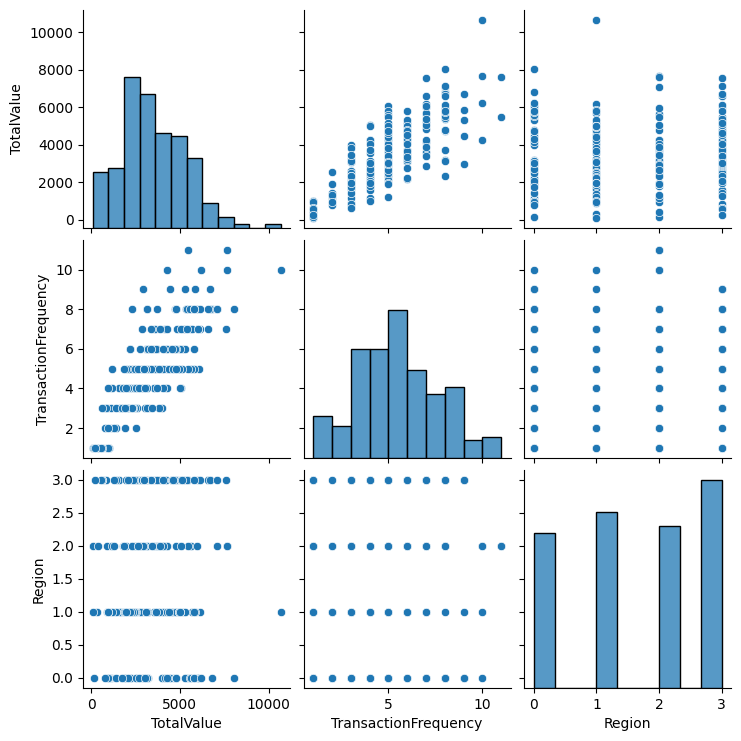

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load data
customers = pd.read_csv(r"C:\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Downloads\Transactions.csv")

# Merge customer and transaction data
data = transactions.merge(customers, on="CustomerID")

# Feature engineering - Create TotalValue (spending) and TransactionFrequency
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Sum of transaction values
    'TransactionID': 'count',  # Count of transactions as TransactionFrequency
    'Region': 'first'  # Assuming we also want Region for profiling
}).reset_index()

# Rename TransactionID to TransactionFrequency
customer_features.rename(columns={'TransactionID': 'TransactionFrequency'}, inplace=True)

# Drop or encode categorical data (Region)
customer_features['Region'] = customer_features['Region'].astype('category').cat.codes

# Standardizing features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'TransactionFrequency', 'Region']])

# Visualize the scaled data
sns.pairplot(customer_features[['TotalValue', 'TransactionFrequency', 'Region']])
plt.show()



In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Set the number of clusters
n_clusters = 4  # You can experiment with 2-10 clusters

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
print("First 5 rows with cluster labels:")
print(customer_features.head())

# Calculate Davies-Bouldin Index (DBI) for clustering quality
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")



First 5 rows with cluster labels:
  CustomerID  TotalValue  TransactionFrequency  Region  Cluster
0      C0001     3354.52                     5       3        0
1      C0002     1862.74                     4       0        2
2      C0003     2725.38                     4       3        0
3      C0004     5354.88                     8       3        1
4      C0005     2034.24                     3       0        2
Davies-Bouldin Index: 1.03


C:\Users\91935\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
from sklearn.metrics import silhouette_score

# Silhouette Score (ranges from -1 to 1; higher is better)
silhouette = silhouette_score(scaled_features, customer_features['Cluster'])
print(f"Silhouette Score: {silhouette}")

# Inertia (Sum of squared distances to the nearest centroid)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")


Silhouette Score: 0.3477316347835255
Inertia: 200.0916066085662


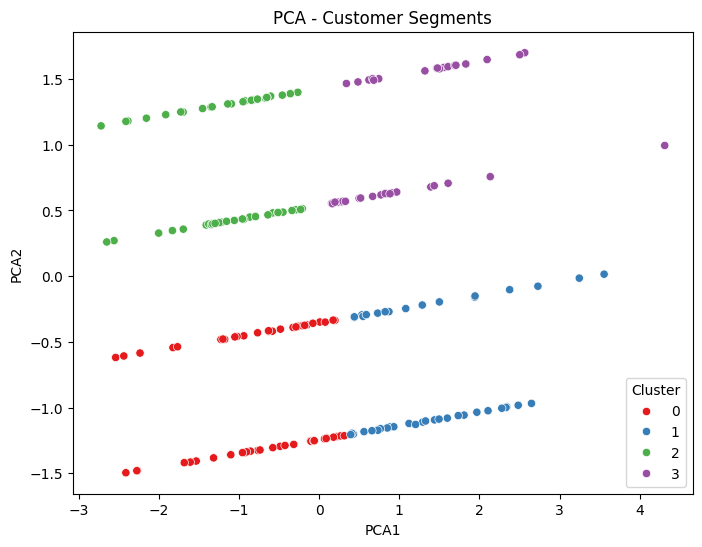

In [8]:
# PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_features['Cluster']

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('PCA - Customer Segments')
plt.show()


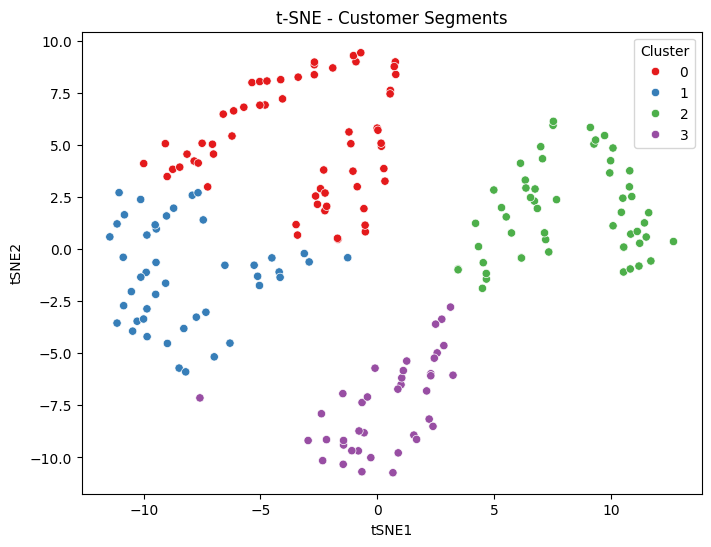

In [9]:
from sklearn.manifold import TSNE

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Create a DataFrame for t-SNE components
tsne_df = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2'])
tsne_df['Cluster'] = customer_features['Cluster']

# Plot t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='Cluster', palette='Set1')
plt.title('t-SNE - Customer Segments')
plt.show()


In [10]:
# Save the final DataFrame with clusters
customer_features.to_csv('Customer_Segmentation_Results.csv', index=False)
